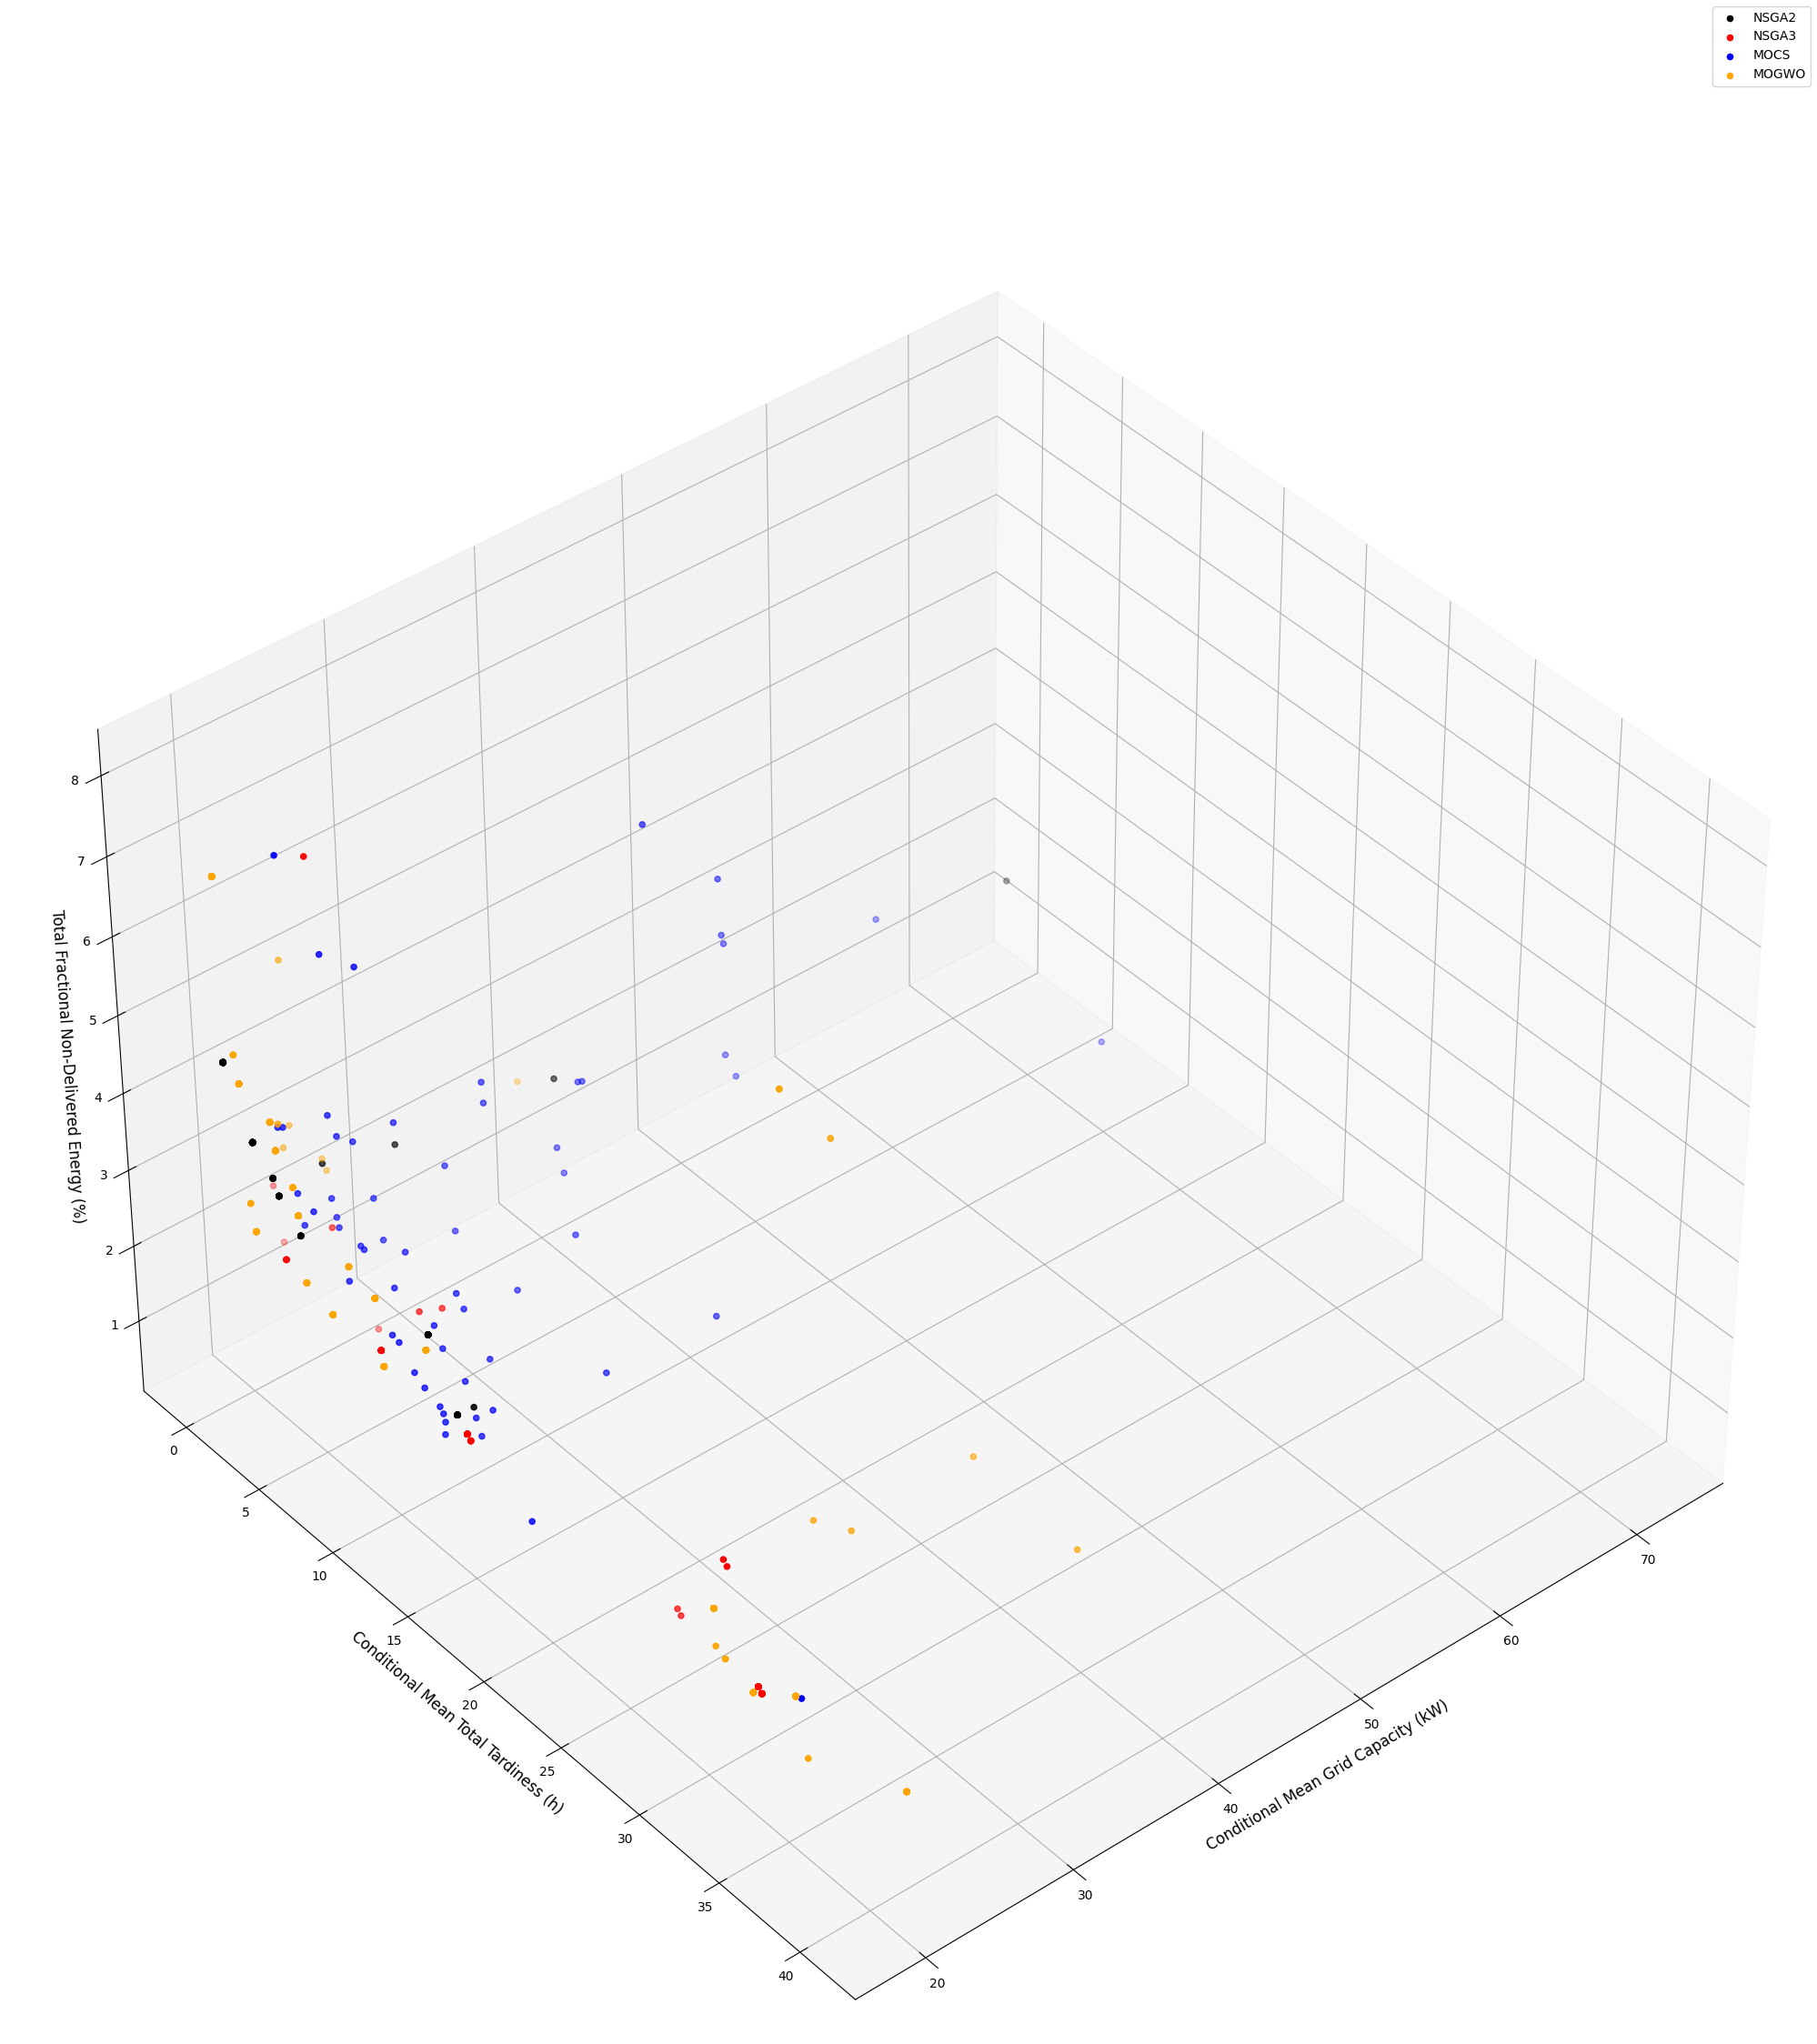

In [2]:
from dependency import *

Instances = load_results("evaluation_instances.pkl")
Instance = Instances[0]
methods = [NSGA2, NSGA3, MOCS, MOGWO]
methods_names = ["NSGA2", "NSGA3", "MOCS", "MOGWO"]
colors = [
    "black",
    "red",
    "blue",
    "orange"
]


sigma, min_percentage, min_distance_between_vehicles, min_pl, min_npl, max_preemptions, num_replications = 1, 70, 5/60, 5/60, 5/60, 10, 30
ref_points = generate_reference_points(num_objectives = 3, divisions=15)
population_size = 100
generations = 100
archive_maxsize = 300
num_points_per_dim = 15
alpha = 1
beta = 1
mutation_rate, p_m = 0.05, 0.1
pc = 0.05

params = {
    "NSGA2": {
        "other_args":(sigma, min_percentage, min_distance_between_vehicles, min_pl, min_npl, max_preemptions, num_replications, p_m),
        "inverse_signs": np.array([1,1,1]),
        "population_size": population_size,
        "generations": generations,
        "mutation_rate":mutation_rate,
        "p_sel": 0.3,
        "show_progress": True,
        },
    "NSGA3": {
        "other_args":(sigma, min_percentage, min_distance_between_vehicles, min_pl, min_npl, max_preemptions, num_replications, p_m, ref_points),
        "inverse_signs": np.array([1,1,1]),
        "population_size": population_size,
        "generations": generations,
        "mutation_rate":mutation_rate,
        "p_sel": 0.3,
        "show_progress": True,
        },
    "MOCS": {
        "other_args":(sigma, min_percentage, min_distance_between_vehicles, min_pl, min_npl, max_preemptions, num_replications, pc),
        "inverse_signs": np.array([1,1,1]),
        "population_size": population_size,
        "generations": generations,
        "perc_abandoned": 0.25,
        "p_sel": 0.3,
        "show_progress": True,
        },
    "MOGWO": {
        "other_args":(archive_maxsize, num_points_per_dim, alpha, beta, num_replications, sigma, min_percentage, min_distance_between_vehicles, min_pl, min_npl, max_preemptions, mutation_rate, p_m),
        "inverse_signs": np.array([1,1,1]),
        "population_size": population_size,
        "generations": generations,
        "show_progress": True,
        }
}

figure = plt.figure(figsize=(20, 25))
ax = figure.add_subplot(111, projection='3d')

for j, method in enumerate(methods):
    result = method(Instance, **params[methods_names[j]])
    x = result['objectives_values_pareto_front'][:,0]
    y = result['objectives_values_pareto_front'][:,1]
    z = result['objectives_values_pareto_front'][:,2]
    ax.scatter(x, y, z, marker='o', color=colors[j], label=methods_names[j])

ax.view_init(elev=40, azim=50)
ax.invert_xaxis()
ax.set_xlabel("Conditional Mean Grid Capacity (kW)", fontsize=12)
ax.set_ylabel("Conditional Mean Total Tardiness (h)", fontsize=12)
ax.set_zlabel("Total Fractional Non-Delivered Energy (%)", fontsize=12)

figure.legend(loc='upper right')
figure.tight_layout()
plt.show()